In [331]:
# Update seaborn / Import packages
!pip install seaborn==0.11

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm

print(sns.__version__)

0.11.0


In [332]:
# Load Data
train = pd.read_csv('/kaggle/input/kakr-4th-competition/train.csv')
test = pd.read_csv('/kaggle/input/kakr-4th-competition/test.csv')

# Data overview

In [333]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [334]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              6512 non-null   int64 
 1   age             6512 non-null   int64 
 2   workclass       6512 non-null   object
 3   fnlwgt          6512 non-null   int64 
 4   education       6512 non-null   object
 5   education_num   6512 non-null   int64 
 6   marital_status  6512 non-null   object
 7   occupation      6512 non-null   object
 8   relationship    6512 non-null   object
 9   race            6512 non-null   object
 10  sex             6512 non-null   object
 11  capital_gain    6512 non-null   int64 
 12  capital_loss    6512 non-null   int64 
 13  hours_per_week  6512 non-null   int64 
 14  native_country  6512 non-null   object
dtypes: int64(7), object(8)
memory usage: 763.2+ KB


In [335]:
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [336]:
test.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,6512.000000,6512.000000,6.512000e+03,6512.000000,6512.000000,6512.000000,6512.000000
mean,3255.500000,38.631296,1.876738e+05,10.049908,1037.483876,85.588145,40.414773
std,1879.996809,13.516418,1.038493e+05,2.593033,7371.453668,401.904741,12.290491
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,1627.750000,28.000000,1.165042e+05,9.000000,0.000000,0.000000,40.000000
50%,3255.500000,37.000000,1.768820e+05,10.000000,0.000000,0.000000,40.000000
75%,4883.250000,48.000000,2.358508e+05,12.000000,0.000000,0.000000,45.000000
max,6511.000000,90.000000,1.125613e+06,16.000000,99999.000000,4356.000000,99.000000


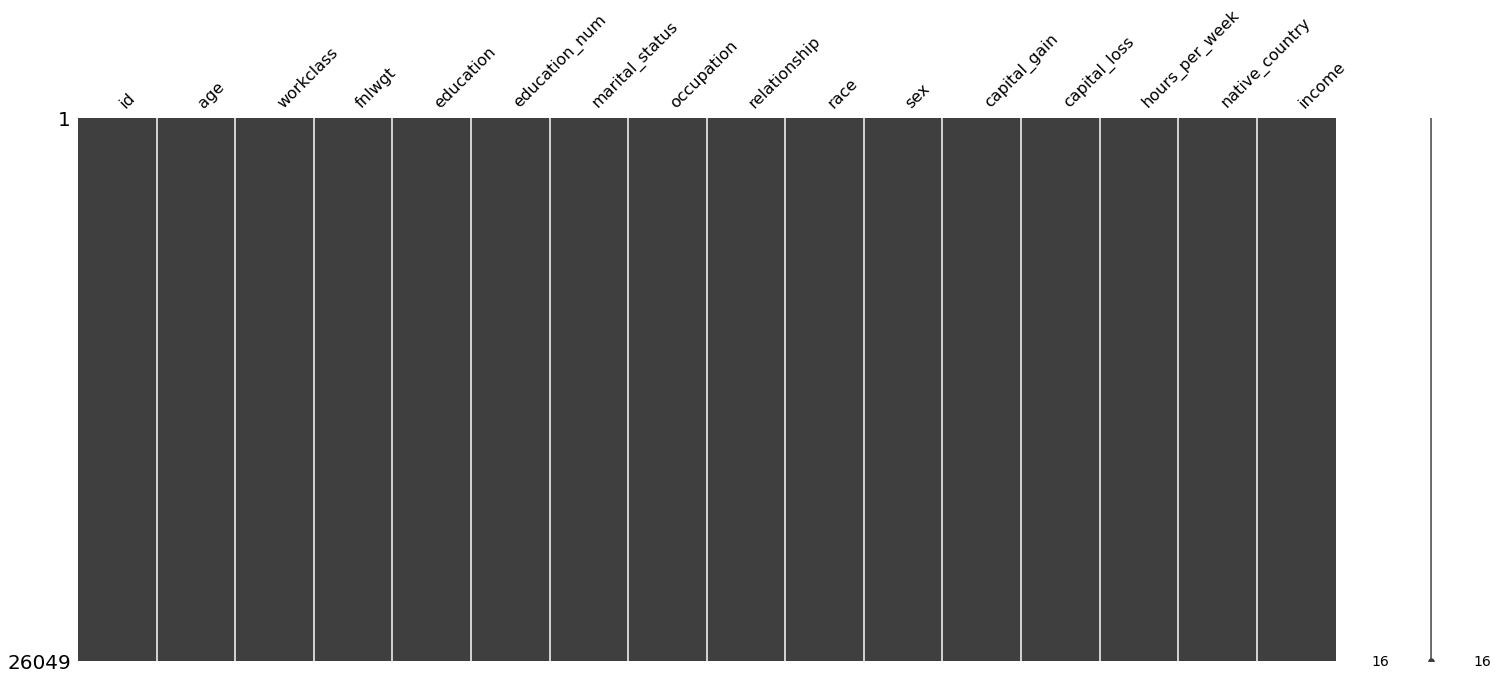

In [337]:
import missingno as msno
msno.matrix(train) 

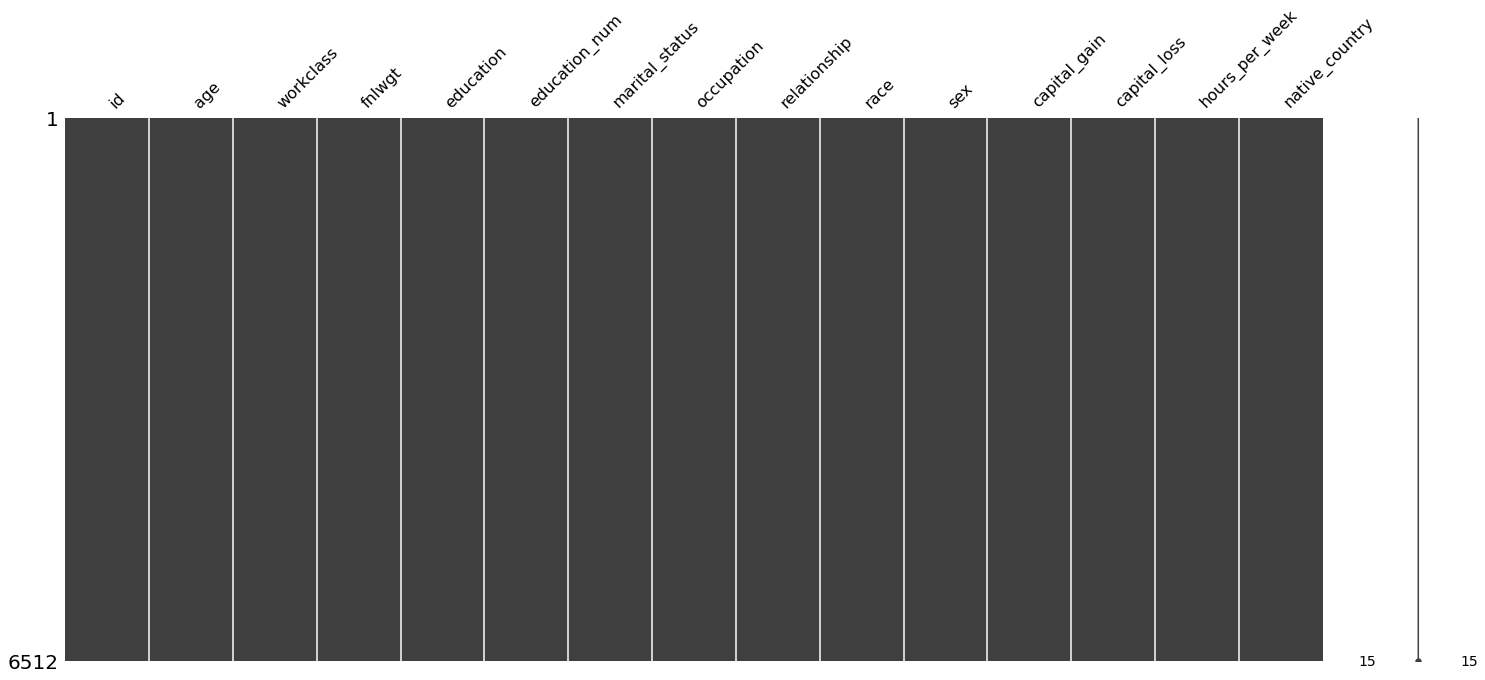

In [338]:
msno.matrix(test)

# Target Variable Check

In [339]:
train.income.describe()

count     26049
unique        2
top       <=50K
freq      19744
Name: income, dtype: object

In [340]:
pd.concat([train['income'].value_counts(),
          train['income'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage'))

,counts,percentage
<=50K,19744,75.795616
>50K,6305,24.204384


# Continuous Variables

### age

In [341]:
train.age.unique()

array([40, 17, 18, 21, 24, 43, 37, 47, 41, 34, 44, 50, 39, 32, 54, 26, 29,
       53, 31, 46, 23, 20, 22, 27, 51, 57, 25, 76, 38, 66, 64, 58, 45, 52,
       67, 65, 35, 19, 68, 28, 33, 36, 63, 62, 42, 59, 49, 30, 56, 48, 61,
       60, 55, 72, 69, 74, 81, 71, 84, 70, 80, 78, 90, 79, 75, 73, 83, 82,
       85, 77, 87, 88, 86])

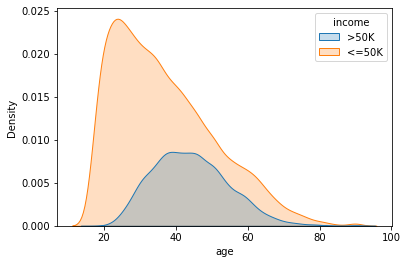

In [342]:
sns.kdeplot(train['age'], shade = True, hue = train['income'])

In [343]:
(train[train['capital_loss']!= 0]['capital_gain']).unique()

array([0])

### education_num

In [344]:
train.education_num.unique()

array([ 9,  5, 10, 13,  7,  2,  3, 12,  6, 15,  4, 14, 11, 16,  8,  1])

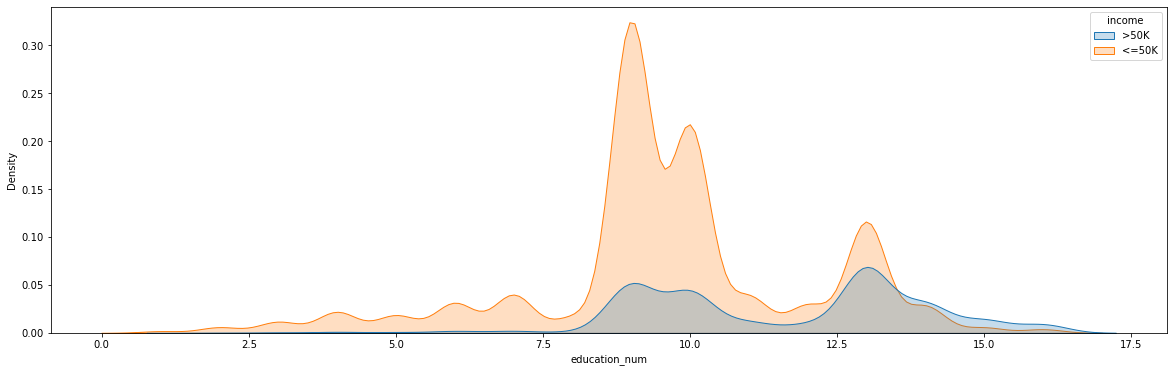

In [345]:
fig, ax = plt.subplots(1, 1, figsize = (20, 6))
sns.kdeplot(train['education_num'], shade = True, hue = train['income'])


### capital_gain

In [346]:
train.capital_gain.unique()

array([    0,  7298,  3103,  2176,  2885,  2174,  3273,  4064,  2414,
        7688, 15024,  2829,  3411, 99999,  1173,  1797,  4650,  4101,
        4386,  3325,  7896,  2580,  2202,  5178,  3781,  6849,  8614,
        3464,  6767,  5013, 20051,  1055,  2050,  2964, 10520,  3908,
        2463,  3942,  4787,   991,   914,  2407,  4934,  3818,  3418,
        2346,  1639, 14344,  1848, 25124,  2228,  1086, 14084, 13550,
       25236,  2538,  6360,  5455, 34095,  3432,  2329,  9386,  6514,
        6723,   114,  2062, 10566,  1151,  6497,  2907,  7443,  4416,
        3137,  9562, 10605,  1506,  6097,  2354, 22040,  2290, 27828,
        3887,   594,  2977,  5721, 15831,  4865,  1111,  2597,  3471,
        3674,  4931,  2993,  7430,  4508,  1471,  1424,  7978,  4687,
       15020,  5556,  3456,  2036,  1409,  2653,  6418, 11678,  2635,
         401, 41310,  2009,  2105,  2387, 18481,  1831,  2936,  2961,
        5060,  1455])

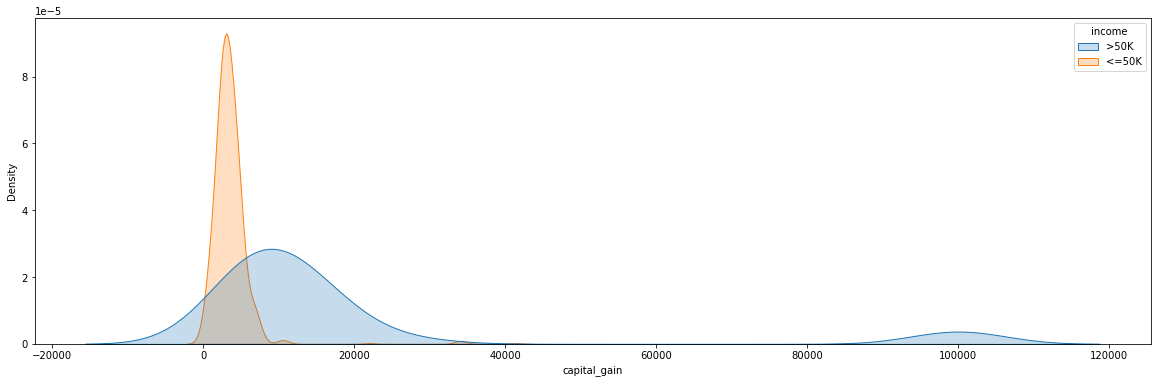

In [347]:
fig, ax = plt.subplots(1, 1, figsize = (20, 6))
sns.kdeplot(train.loc[train['capital_gain'] > 0,'capital_gain'], shade = True, hue = train['income'])

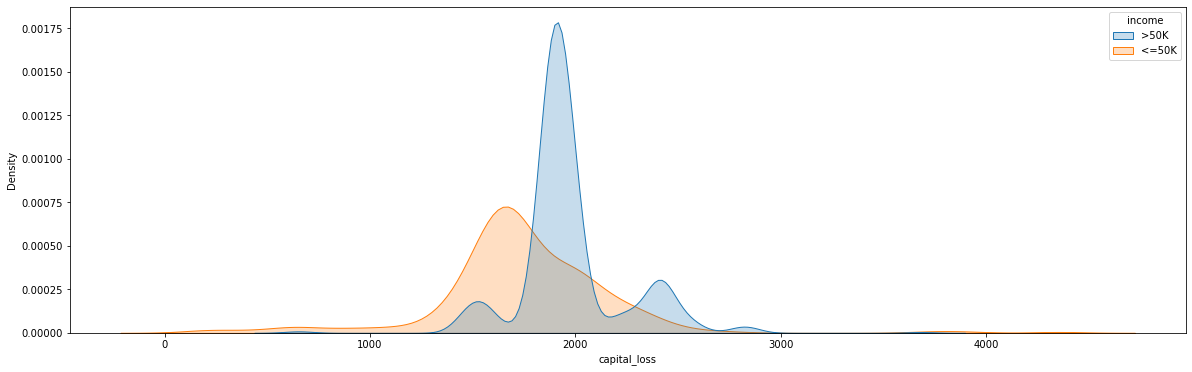

In [348]:
fig, ax = plt.subplots(1, 1, figsize = (20, 6))
sns.kdeplot(train.loc[train['capital_loss'] > 0,'capital_loss'], shade = True, hue = train['income'])

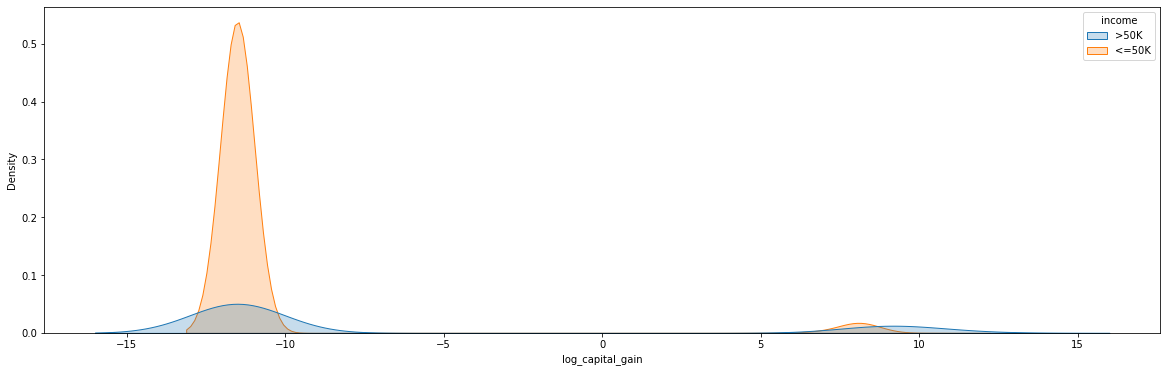

In [349]:
train['log_capital_gain'] = np.log(train['capital_gain'] + 0.00001)
fig, ax = plt.subplots(1, 1, figsize = (20, 6))
sns.kdeplot(train['log_capital_gain'], shade = True, hue = train['income'])

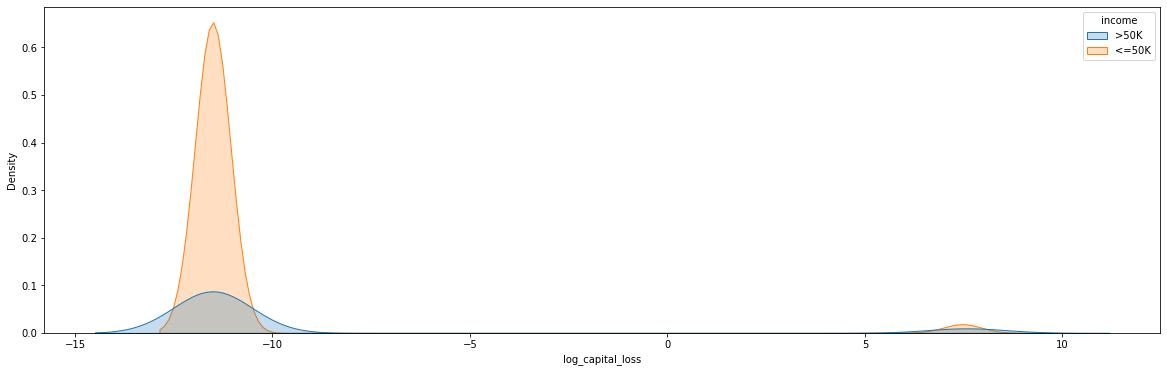

In [350]:
train['log_capital_loss'] = np.log(train['capital_loss'] + 0.00001)
fig, ax = plt.subplots(1, 1, figsize = (20, 6))
sns.kdeplot(train['log_capital_loss'], shade = True, hue = train['income'])

### capital_loss

In [351]:
train.capital_loss.unique()

array([   0, 2051, 1980, 1602, 1590, 1977, 1740, 2415, 1617, 1887, 1902,
       1719, 1579, 1672, 1974, 1848, 1628, 2206, 1741, 2824, 2002, 3683,
       2547, 1876, 1485, 1721, 2258, 2129, 1669,  880, 2457, 2559, 2057,
       2603, 1408, 2201, 1504, 1668, 1762, 2392, 2377, 2001,  625, 2179,
       1651, 1138, 1380, 1825, 1726, 2489, 2174, 1564, 2042,  974, 1648,
       1816, 2246, 1258, 1092, 1340, 2163,  213, 2205, 3770,  323, 2444,
       2231, 1594, 3900, 4356,  810, 2352, 2339, 2149, 2467, 2754, 1573,
       1411, 1735, 2472,  155, 2238,  419, 1944, 1755, 2267, 1844,  653,
       1539, 2080])

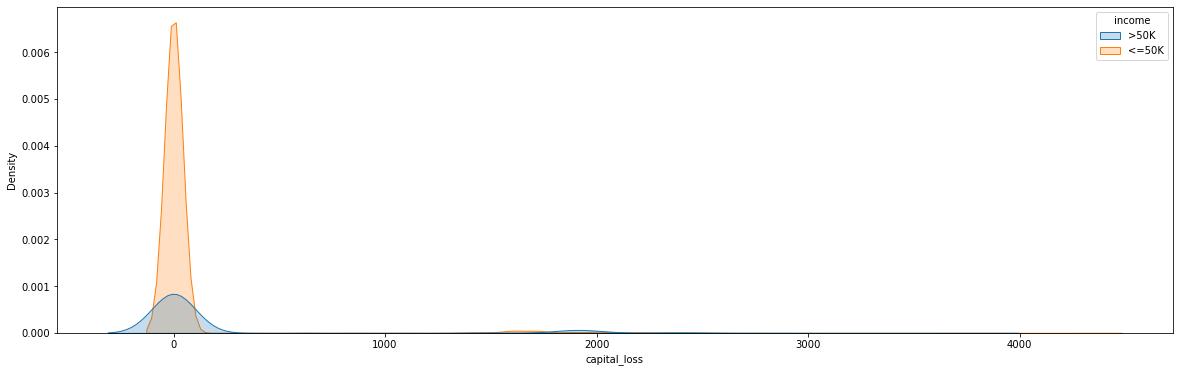

In [352]:
fig, ax = plt.subplots(1, 1, figsize = (20, 6))
sns.kdeplot(train['capital_loss'], shade = True, hue = train['income'])


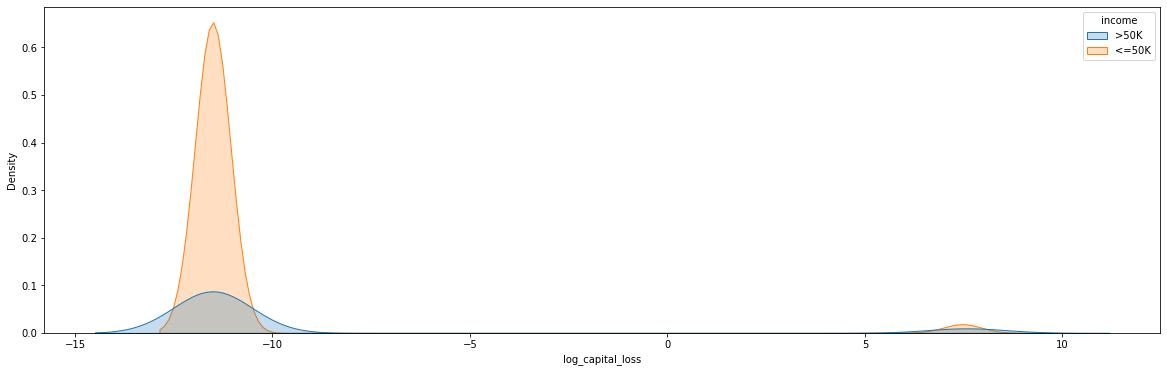

In [353]:
train['log_capital_loss'] = np.log(train['capital_loss'] + 0.00001)
fig, ax = plt.subplots(1, 1, figsize = (20, 6))
sns.kdeplot(train['log_capital_loss'], shade = True, hue = train['income'])

### capital_net

In [354]:
train['capital_net'] = train['capital_gain'] - train['capital_loss']

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


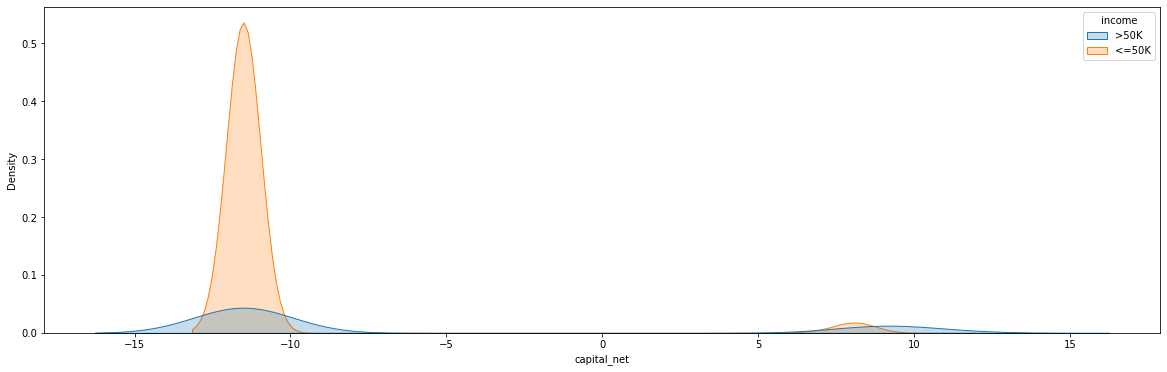

In [355]:
fig, ax = plt.subplots(1, 1, figsize = (20, 6))
sns.kdeplot(np.log(train['capital_net'] + 0.00001), shade = True, hue = train['income'])

In [356]:
train['capital_net'].describe()

count    26049.000000
mean       999.956966
std       7412.734148
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_net, dtype: float64

### hours_per_week

In [357]:
train.hours_per_week.unique()

array([60, 20, 16, 25, 40, 50, 65, 35, 45,  5, 99, 36, 52, 30, 10, 48, 55,
       18, 42, 32, 22, 80, 70, 43, 38, 46, 84, 37,  7,  8, 26, 15, 44, 24,
       49, 72, 14, 47, 41, 68, 90, 85,  4, 54, 12, 56,  3,  9, 33, 17, 66,
       91, 58, 13, 62, 11, 23, 34,  1, 27, 53, 75, 28, 96,  6, 57, 95, 64,
       19, 39, 31, 59, 29,  2, 98, 51, 67, 21, 86, 82, 78, 77, 74, 63, 76,
       97, 73, 81, 92, 89, 88, 94, 61])

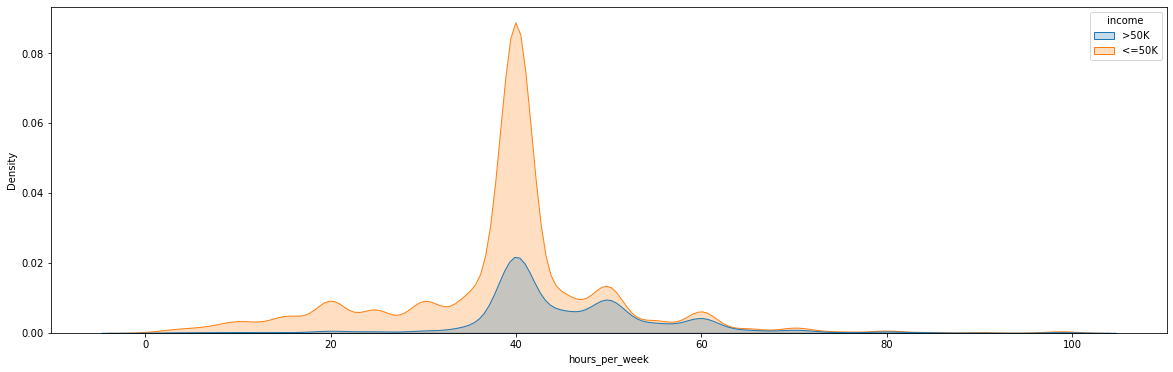

In [358]:
fig, ax = plt.subplots(1, 1, figsize = (20, 6))
sns.kdeplot(train['hours_per_week'], shade = True, hue = train['income'])

# Categorical Variables

### workclass

In [359]:
pd.concat([train['workclass'].value_counts(),
          train['workclass'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage'))

,counts,percentage
Private,18123,69.572728
Self-emp-not-inc,2030,7.793005
Local-gov,1692,6.495451
?,1502,5.766056
State-gov,1043,4.003992
Self-emp-inc,877,3.366732
Federal-gov,765,2.936773
Without-pay,11,0.042228
Never-worked,6,0.023034


In [360]:
pd.crosstab(train['income'], train['workclass'])

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
income,,,,,,,,,
<=50K,1349,473,1187,6,14130,381,1453,754,11
>50K,153,292,505,0,3993,496,577,289,0


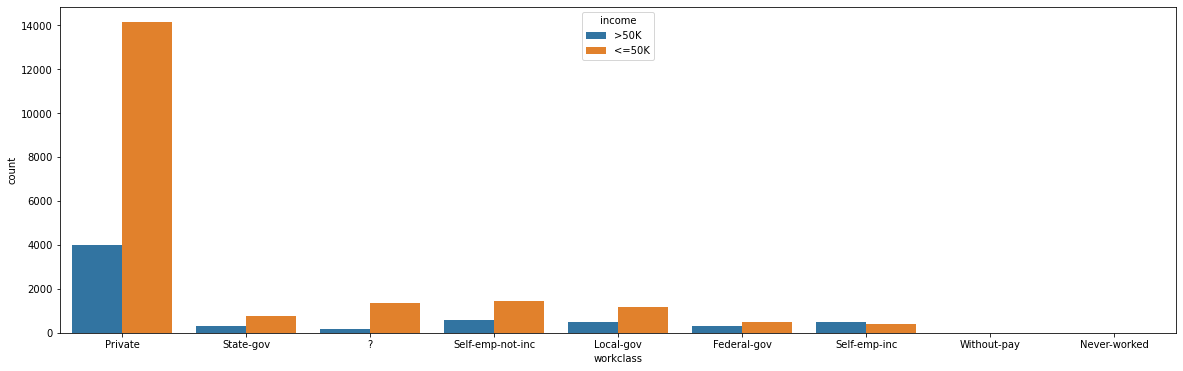

In [361]:
fig, ax = plt.subplots(1, 1, figsize = (20, 6))
sns.countplot(x = 'workclass', hue = train['income'], data = train)

### education

In [362]:
pd.concat([train['education'].value_counts(),
          train['education'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage'))

,counts,percentage
HS-grad,8433,32.373604
Some-college,5800,22.265730
Bachelors,4344,16.676264
Masters,1378,5.290030
Assoc-voc,1096,4.207455
11th,922,3.539483
Assoc-acdm,842,3.232370
10th,731,2.806250
7th-8th,505,1.938654
Prof-school,466,1.788936


In [363]:
pd.crosstab(train['income'], train['education'])

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
income,,,,,,,,,,,,,,,,
<=50K,678,867,333,129,252,476,396,627,816,2539,84,7096,604,40,124,4683
>50K,53,55,26,5,13,29,22,215,280,1805,232,1337,774,0,342,1117


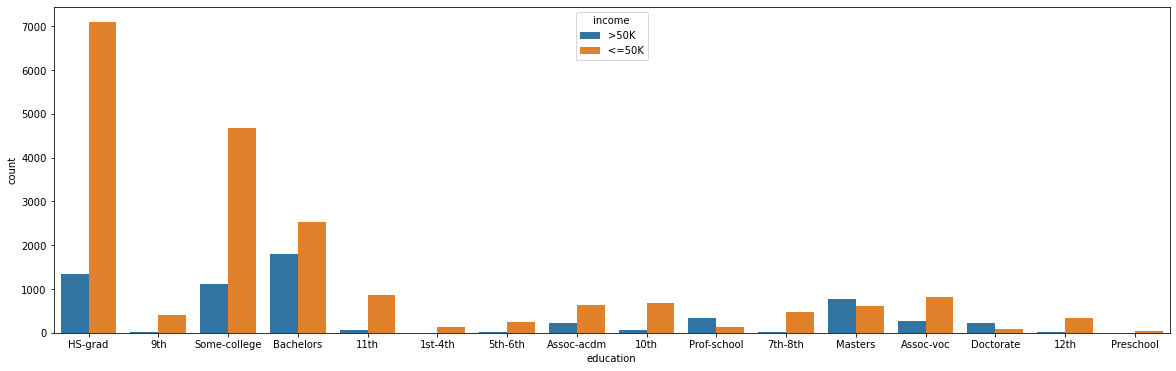

In [364]:
fig, ax = plt.subplots(1, 1, figsize = (20, 6))
sns.countplot(x = 'education', hue = train['income'], data = train)

### marital_status

In [365]:
pd.concat([train['marital_status'].value_counts(),
          train['marital_status'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage'))

,counts,percentage
Married-civ-spouse,11970,45.951860
Never-married,8568,32.891858
Divorced,3536,13.574417
Separated,826,3.170947
Widowed,796,3.055779
Married-spouse-absent,334,1.282199
Married-AF-spouse,19,0.072939


In [366]:
pd.crosstab(train['income'], train['marital_status'])

marital_status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
income,,,,,,,
<=50K,3165,9,6598,307,8167,772,726
>50K,371,10,5372,27,401,54,70


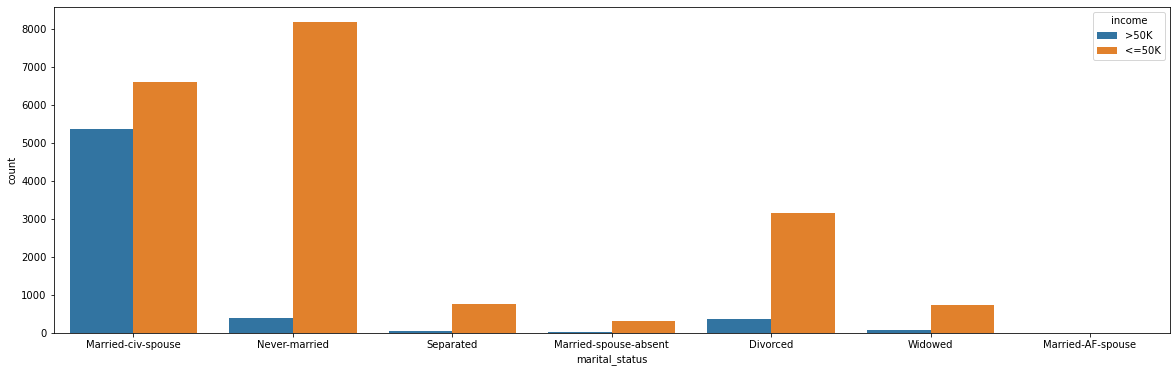

In [367]:
fig, ax = plt.subplots(1, 1, figsize = (20, 6))
sns.countplot(x = 'marital_status', hue = train['income'], data = train)

### occupation

In [368]:
pd.concat([train['occupation'].value_counts(),
          train['occupation'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage'))

,counts,percentage
Prof-specialty,3304,12.683788
Craft-repair,3262,12.522554
Exec-managerial,3246,12.461131
Sales,2998,11.509079
Adm-clerical,2983,11.451495
Other-service,2626,10.081001
Machine-op-inspct,1582,6.073170
?,1508,5.789090
Transport-moving,1270,4.875427
Handlers-cleaners,1092,4.192100


In [369]:
pd.crosstab(train['income'], train['occupation'])

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
income,,,,,,,,,,,,,,,
<=50K,1355,2581,7,2524,1653,693,1021,1382,2516,122,1813,355,2187,518,1017
>50K,153,402,0,738,1593,91,71,200,110,1,1491,167,811,224,253


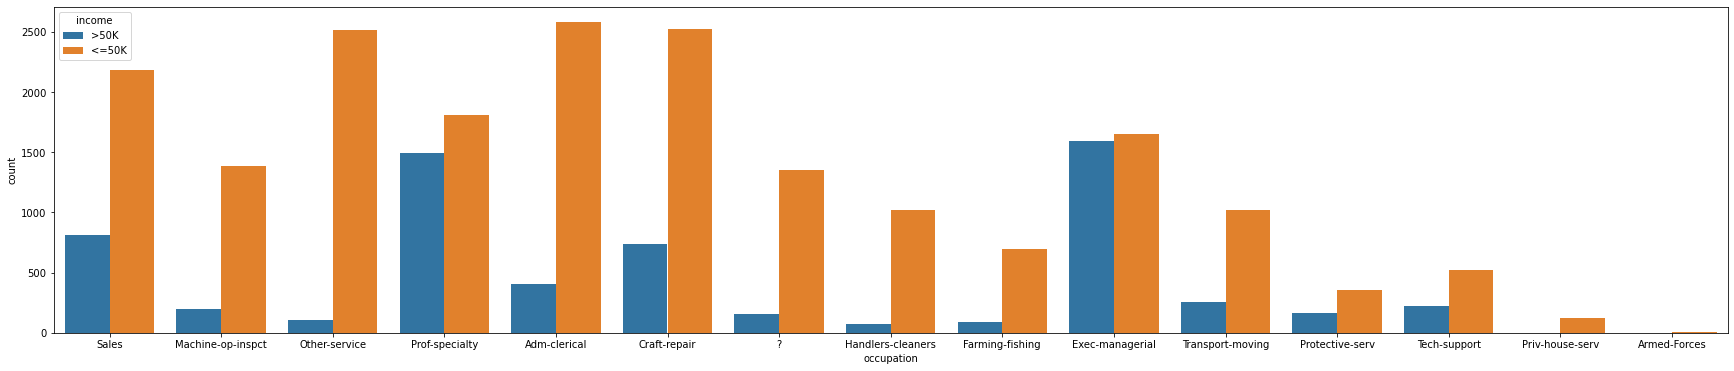

In [370]:
fig, ax = plt.subplots(1, 1, figsize = (30, 6))
sns.countplot(x = 'occupation', hue = train['income'], data = train)

### relationship

In [371]:
pd.concat([train['relationship'].value_counts(),
          train['relationship'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage'))

,counts,percentage
Husband,10541,40.466045
Not-in-family,6632,25.459711
Own-child,4099,15.735729
Unmarried,2740,10.518638
Wife,1260,4.837038
Other-relative,777,2.982840


In [372]:
pd.crosstab(train['income'], train['relationship'])

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
income,,,,,,
<=50K,5801,5937,744,4047,2564,651
>50K,4740,695,33,52,176,609


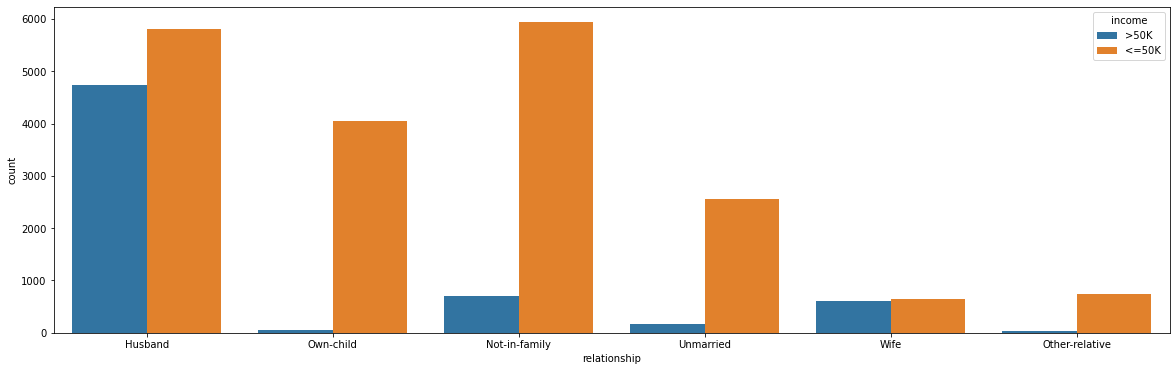

In [373]:
fig, ax = plt.subplots(1, 1, figsize = (20, 6))
sns.countplot(x = 'relationship', hue = train['income'], data = train)

### race

In [374]:
pd.concat([train['race'].value_counts(),
          train['race'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage'))

,counts,percentage
White,22315,85.665477
Black,2476,9.505163
Asian-Pac-Islander,800,3.071135
Amer-Indian-Eskimo,254,0.975085
Other,204,0.783139


In [375]:
pd.crosstab(train['income'], train['race'])

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
income,,,,,
<=50K,225,585,2174,186,16574
>50K,29,215,302,18,5741


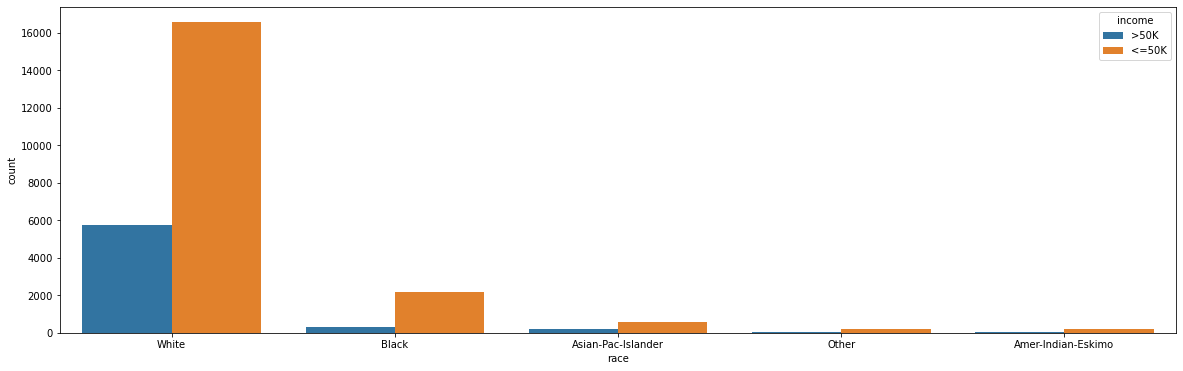

In [376]:
fig, ax = plt.subplots(1, 1, figsize = (20, 6))
sns.countplot(x = 'race', hue = train['income'], data = train)

### sex

In [377]:
pd.concat([train['sex'].value_counts(),
          train['sex'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage'))

,counts,percentage
Male,17482,67.111981
Female,8567,32.888019


In [378]:
pd.crosstab(train['income'], train['sex'])

sex,Female,Male
income,,
<=50K,7614,12130
>50K,953,5352


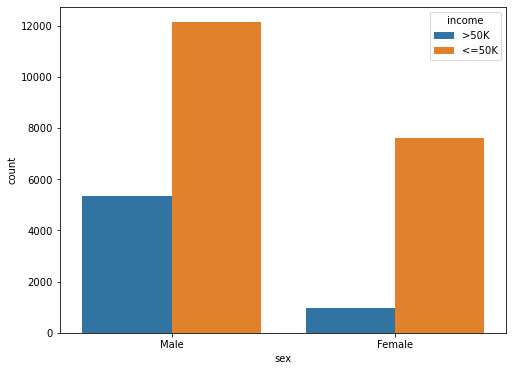

In [379]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.countplot(x = 'sex', hue = train['income'], data = train)

### native_country

In [380]:
pd.concat([train['native_country'].value_counts(),
          train['native_country'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage'))

,counts,percentage
United-States,23371,89.719375
Mexico,534,2.049983
?,456,1.750547
Philippines,163,0.625744
Germany,101,0.387731
Puerto-Rico,95,0.364697
Canada,92,0.353181
El-Salvador,79,0.303275
India,77,0.295597
Cuba,76,0.291758


In [381]:
pd.crosstab(train['income'], train['native_country'])

native_country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
income,,,,,,,,,,,,,,,,,,,,,
<=50K,349,8,63,44,50,56,46,20,72,44,...,28,84,6,49,21,11,13,17591,46,7
>50K,107,6,29,13,2,20,2,4,7,23,...,2,11,2,14,18,2,1,5780,4,5


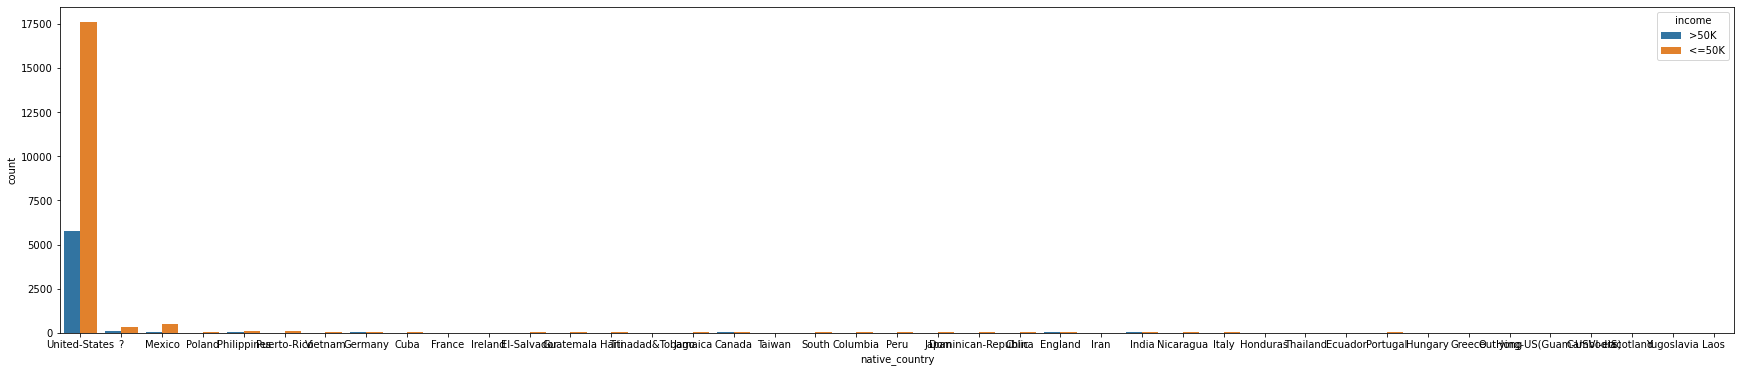

In [382]:
fig, ax = plt.subplots(1, 1, figsize = (30, 6))
sns.countplot(x = 'native_country', hue = train['income'], data = train)

### '?' Exploration

In [383]:
train[train['workclass'] == '?']
# occupation과의 관계 살펴볼 것

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,log_capital_gain,log_capital_loss,capital_net
11,11,21,?,204226,Some-college,10,Never-married,?,Unmarried,White,Female,0,0,35,United-States,<=50K,-11.512925,-11.512925,0
30,30,20,?,202994,Some-college,10,Never-married,?,Own-child,White,Female,0,0,16,United-States,<=50K,-11.512925,-11.512925,0
34,34,31,?,505438,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,30,Mexico,<=50K,-11.512925,-11.512925,0
66,66,67,?,39100,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,5,United-States,<=50K,-11.512925,-11.512925,0
67,67,65,?,404601,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,2414,0,30,United-States,<=50K,7.789040,-11.512925,2414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,26009,73,?,89852,1st-4th,2,Married-civ-spouse,?,Husband,White,Male,0,0,40,Portugal,<=50K,-11.512925,-11.512925,0
26010,26010,63,?,321403,9th,5,Separated,?,Not-in-family,Black,Male,0,0,40,United-States,<=50K,-11.512925,-11.512925,0
26012,26012,36,?,214896,9th,5,Divorced,?,Unmarried,White,Female,0,0,40,Mexico,<=50K,-11.512925,-11.512925,0
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K,-11.512925,-11.512925,0


In [384]:
train[train['native_country'] == '?']

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,log_capital_gain,log_capital_loss,capital_net
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K,-11.512925,-11.512925,0
133,133,36,Private,150601,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,?,<=50K,-11.512925,-11.512925,0
138,138,23,Private,184400,10th,6,Never-married,Transport-moving,Own-child,Asian-Pac-Islander,Male,0,0,30,?,<=50K,-11.512925,-11.512925,0
160,160,28,Private,309620,Some-college,10,Married-civ-spouse,Sales,Husband,Other,Male,0,0,60,?,<=50K,-11.512925,-11.512925,0
172,172,45,Private,480717,Bachelors,13,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,38,?,<=50K,-11.512925,-11.512925,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,25791,26,Private,359327,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,<=50K,-11.512925,-11.512925,0
25807,25807,46,Private,126513,HS-grad,9,Separated,Craft-repair,Unmarried,Black,Female,0,0,40,?,<=50K,-11.512925,-11.512925,0
25870,25870,37,Private,130620,12th,8,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,0,33,?,<=50K,-11.512925,-11.512925,0
25895,25895,27,Private,104457,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Male,0,0,40,?,<=50K,-11.512925,-11.512925,0


In [385]:
train.sample(10)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,log_capital_gain,log_capital_loss,capital_net
13355,13355,42,Private,198316,Assoc-voc,11,Divorced,Craft-repair,Not-in-family,White,Male,0,0,35,United-States,<=50K,-11.512925,-11.512925,0
23600,23600,50,Self-emp-not-inc,334273,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,8,United-States,<=50K,-11.512925,-11.512925,0
21868,21868,22,Private,204160,HS-grad,9,Divorced,Machine-op-inspct,Own-child,White,Female,0,0,40,United-States,<=50K,-11.512925,-11.512925,0
3192,3192,40,Private,373050,12th,8,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,?,<=50K,-11.512925,-11.512925,0
18953,18953,78,Private,111189,7th-8th,4,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,35,Dominican-Republic,<=50K,-11.512925,-11.512925,0
6794,6794,34,Private,258675,HS-grad,9,Never-married,Transport-moving,Own-child,White,Male,0,0,40,United-States,<=50K,-11.512925,-11.512925,0
7627,7627,42,Local-gov,191149,Masters,14,Never-married,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K,-11.512925,-11.512925,0
25459,25459,65,?,327154,HS-grad,9,Widowed,?,Unmarried,White,Female,0,0,40,United-States,<=50K,-11.512925,-11.512925,0
6227,6227,50,Private,269095,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K,-11.512925,-11.512925,0
9423,9423,43,Self-emp-inc,104892,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,45,United-States,<=50K,-11.512925,-11.512925,0


# Train-Test Comparison

In [386]:
# Tables -side by side

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

### KS test
(H0: The two samples are drawn from the same distribution)


-capital gain / loss

-hours_per_week

-native_country

In [387]:
test2 = test
train2 = train

In [388]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train2 = train.apply(le.fit_transform)
test2 = test.apply(le.fit_transform)

In [389]:
columns = list(test)
for i in columns:
    print(sp.stats.ks_2samp(train2[i], test2[i]), i)

Ks_2sampResult(statistic=0.750009597297401, pvalue=0.0) id
Ks_2sampResult(statistic=0.008738516138032448, pvalue=0.8211767435729053) age
Ks_2sampResult(statistic=0.009246306313852093, pvalue=0.7646242948966069) workclass
Ks_2sampResult(statistic=0.680601942492994, pvalue=0.0) fnlwgt
Ks_2sampResult(statistic=0.009375091669517555, pvalue=0.7496328584086702) education
Ks_2sampResult(statistic=0.00966486166733782, pvalue=0.7152453783416223) education_num
Ks_2sampResult(statistic=0.005590018971050936, pvalue=0.9968228993386202) marital_status
Ks_2sampResult(statistic=0.01396604848752725, pvalue=0.2614816748545794) occupation
Ks_2sampResult(statistic=0.006399304589734145, pvalue=0.983284285497216) relationship
Ks_2sampResult(statistic=0.011906608769732124, pvalue=0.45116201687076396) race
Ks_2sampResult(statistic=0.009571901112843173, pvalue=0.7263606377728211) sex
Ks_2sampResult(statistic=0.04368689776958812, pvalue=4.621632011188019e-09) capital_gain
Ks_2sampResult(statistic=0.022956458311

### age

Ks_2sampResult(statistic=0.008738516138032448, pvalue=0.8211767435729053)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


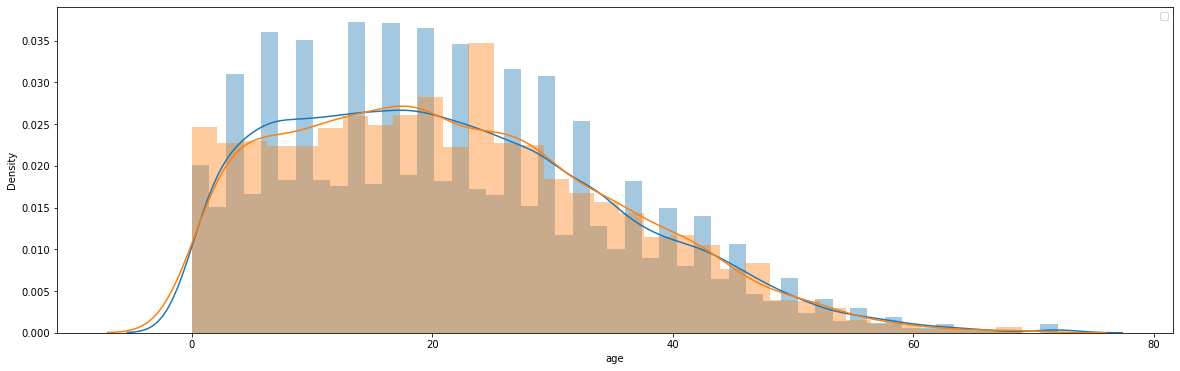

In [390]:
print(sp.stats.ks_2samp(test2['age'], train2['age']))

fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax = sns.distplot(train2['age'], kde = True)
ax = sns.distplot(test2['age'], kde = True)
plt.legend()
plt.show()

### workclass

Ks_2sampResult(statistic=0.009246306313852093, pvalue=0.7646242948966069)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


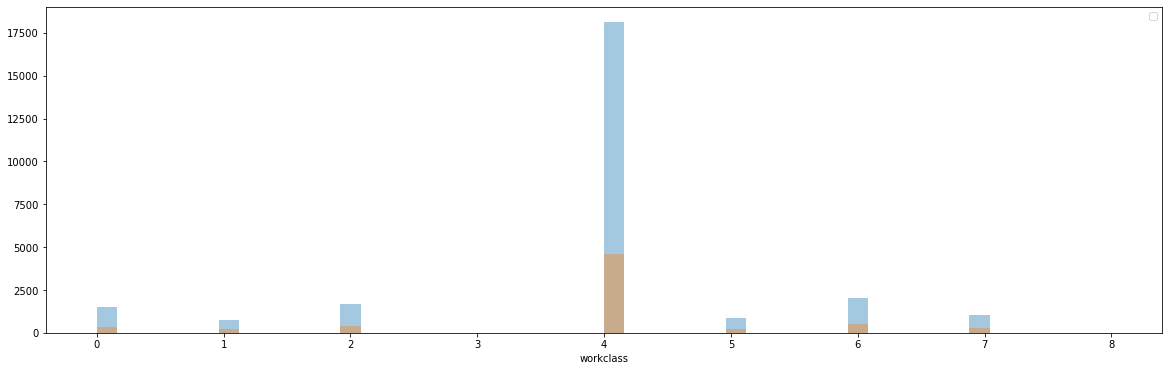

In [391]:
print(sp.stats.ks_2samp(test2['workclass'], train2['workclass']))

fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax = sns.distplot(train2['workclass'], kde = False)
ax = sns.distplot(test2['workclass'], kde = False)
plt.legend()
plt.show()

In [392]:
display_side_by_side(pd.concat([train['workclass'].value_counts(),
          train['workclass'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage')), 
                     pd.concat([test['workclass'].value_counts(),
          test['workclass'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage')))

,counts,percentage
Private,18123,69.572728
Self-emp-not-inc,2030,7.793005
Local-gov,1692,6.495451
?,1502,5.766056
State-gov,1043,4.003992
Self-emp-inc,877,3.366732
Federal-gov,765,2.936773
Without-pay,11,0.042228
Never-worked,6,0.023034
,counts,percentage


### education

Ks_2sampResult(statistic=0.009375091669517555, pvalue=0.7496328584086702)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


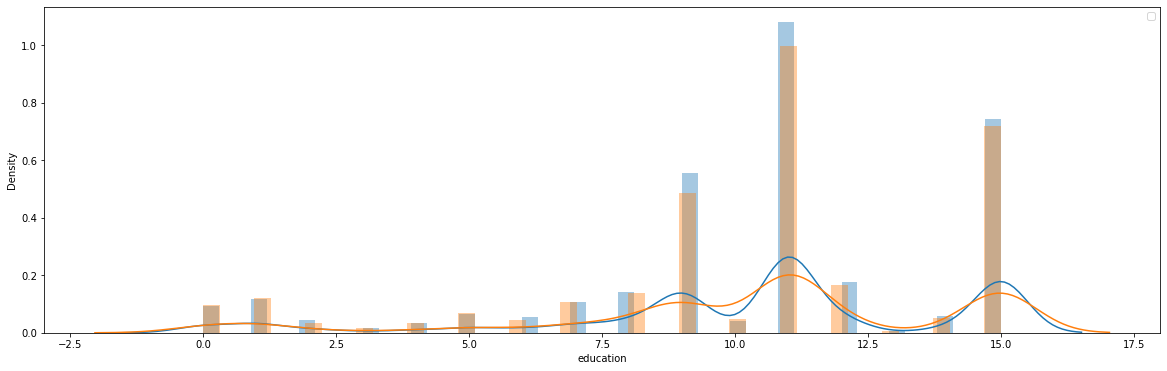

In [393]:
# education
print(sp.stats.ks_2samp(test2['education'], train2['education']))

fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax = sns.distplot(train2['education'], kde = True)
ax = sns.distplot(test2['education'], kde = True)
plt.legend()
plt.show()

In [394]:
display_side_by_side(pd.concat([train['education'].value_counts(),
          train['education'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage')), 
                     pd.concat([test['education'].value_counts(),
          test['education'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage')))

,counts,percentage
HS-grad,8433,32.373604
Some-college,5800,22.265730
Bachelors,4344,16.676264
Masters,1378,5.290030
Assoc-voc,1096,4.207455
11th,922,3.539483
Assoc-acdm,842,3.232370
10th,731,2.806250
7th-8th,505,1.938654
Prof-school,466,1.788936


### education_num

Ks_2sampResult(statistic=0.00966486166733782, pvalue=0.7152453783416223)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


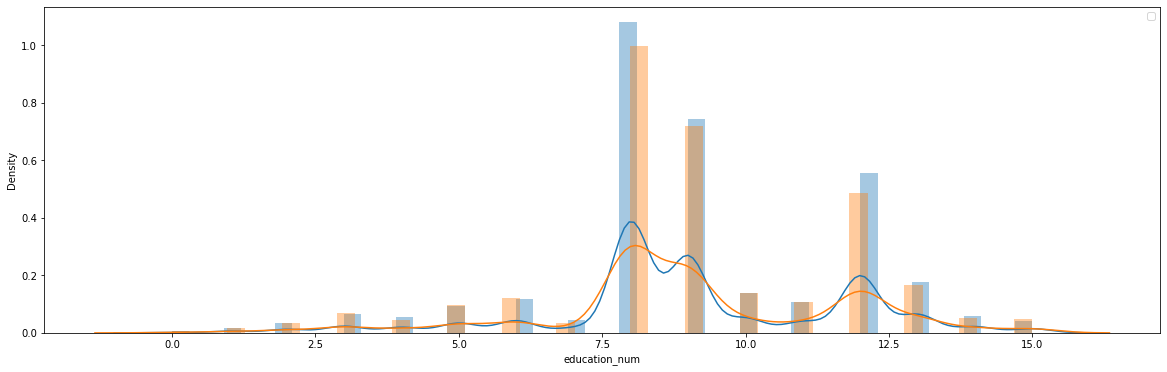

In [395]:
print(sp.stats.ks_2samp(test2['education_num'], train2['education_num']))

fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax = sns.distplot(train2['education_num'], kde = True)
ax = sns.distplot(test2['education_num'], kde = True)
plt.legend()
plt.show()

### marital_status

Ks_2sampResult(statistic=0.005590018971050936, pvalue=0.9968228993386202)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


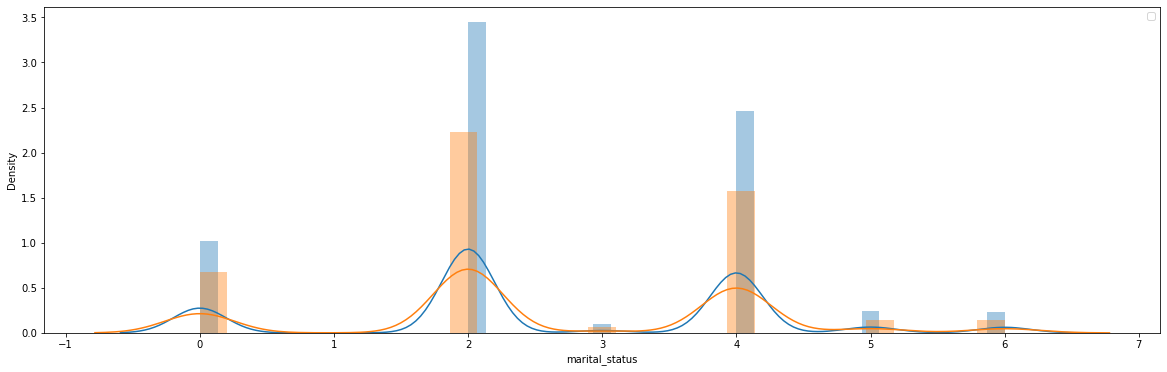

In [396]:
print(sp.stats.ks_2samp(test2['marital_status'], train2['marital_status']))

fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax = sns.distplot(train2['marital_status'], kde = True)
ax = sns.distplot(test2['marital_status'], kde = True)
plt.legend()
plt.show()

In [397]:
display_side_by_side(pd.concat([train['marital_status'].value_counts(),
          train['marital_status'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage')), 
                     pd.concat([test['marital_status'].value_counts(),
          test['marital_status'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage')))

,counts,percentage
Married-civ-spouse,11970,45.951860
Never-married,8568,32.891858
Divorced,3536,13.574417
Separated,826,3.170947
Widowed,796,3.055779
Married-spouse-absent,334,1.282199
Married-AF-spouse,19,0.072939
,counts,percentage
Married-civ-spouse,3006,46.160934
Never-married,2115,32.478501


### occupation

Ks_2sampResult(statistic=0.01396604848752725, pvalue=0.2614816748545794)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


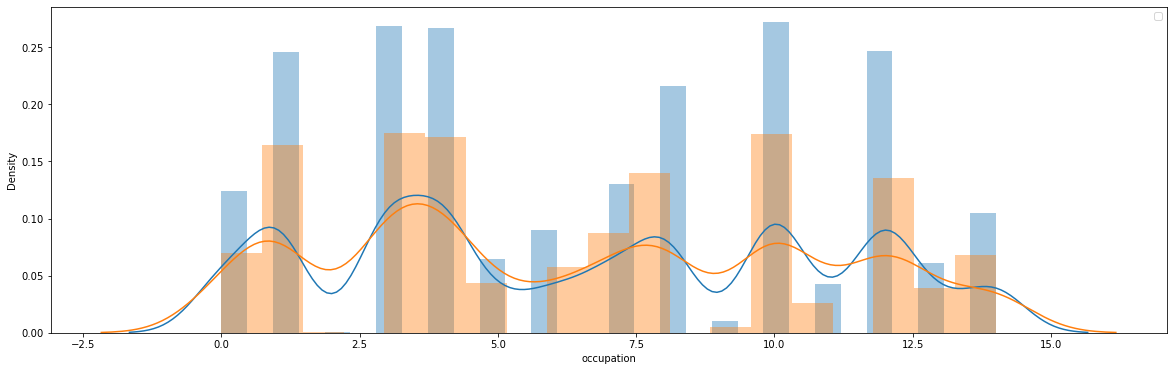

In [398]:
print(sp.stats.ks_2samp(test2['occupation'], train2['occupation']))

fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax = sns.distplot(train2['occupation'], kde = True)
ax = sns.distplot(test2['occupation'], kde = True)
plt.legend()
plt.show()

In [399]:
display_side_by_side(pd.concat([train['occupation'].value_counts(),
          train['occupation'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage')), 
                     pd.concat([test['occupation'].value_counts(),
          test['occupation'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage')))

,counts,percentage
Prof-specialty,3304,12.683788
Craft-repair,3262,12.522554
Exec-managerial,3246,12.461131
Sales,2998,11.509079
Adm-clerical,2983,11.451495
Other-service,2626,10.081001
Machine-op-inspct,1582,6.073170
?,1508,5.789090
Transport-moving,1270,4.875427
Handlers-cleaners,1092,4.192100


### relationship

Ks_2sampResult(statistic=0.006399304589734145, pvalue=0.983284285497216)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


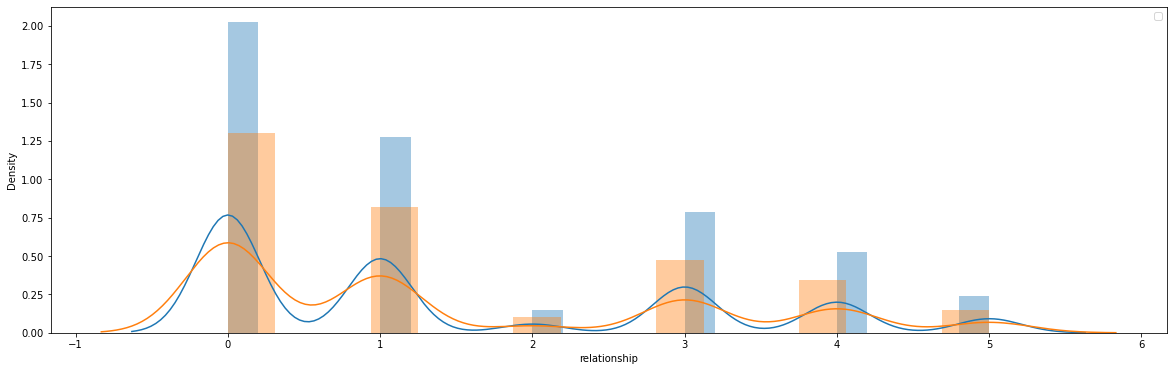

In [400]:
print(sp.stats.ks_2samp(test2['relationship'], train2['relationship']))

fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax = sns.distplot(train2['relationship'], kde = True)
ax = sns.distplot(test2['relationship'], kde = True)
plt.legend()
plt.show()

In [401]:
display_side_by_side(pd.concat([train['relationship'].value_counts(),
          train['relationship'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage')), 
                     pd.concat([test['relationship'].value_counts(),
          test['relationship'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage')))

,counts,percentage
Husband,10541,40.466045
Not-in-family,6632,25.459711
Own-child,4099,15.735729
Unmarried,2740,10.518638
Wife,1260,4.837038
Other-relative,777,2.982840
,counts,percentage
Husband,2652,40.724816
Not-in-family,1673,25.691032
Own-child,969,14.880221


### race

Ks_2sampResult(statistic=0.011906608769732124, pvalue=0.45116201687076396)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


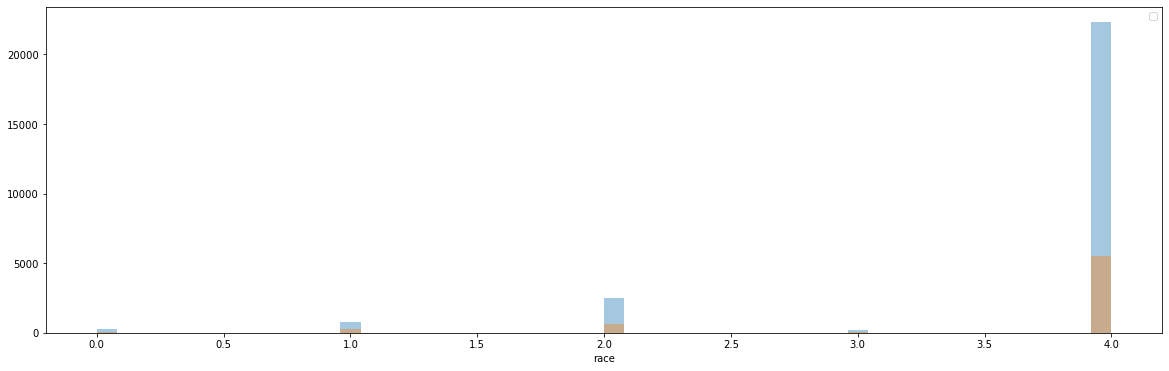

In [402]:
print(sp.stats.ks_2samp(test2['race'], train2['race']))

fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax = sns.distplot(train2['race'], kde = False)
ax = sns.distplot(test2['race'], kde = False)
plt.legend()
plt.show()

In [403]:
display_side_by_side(pd.concat([train['race'].value_counts(),
          train['race'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage')), 
                     pd.concat([test['race'].value_counts(),
          test['race'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage')))

,counts,percentage
White,22315,85.665477
Black,2476,9.505163
Asian-Pac-Islander,800,3.071135
Amer-Indian-Eskimo,254,0.975085
Other,204,0.783139
,counts,percentage
White,5501,84.474816
Black,648,9.950860
Asian-Pac-Islander,239,3.670147
Other,67,1.028870


### sex

Ks_2sampResult(statistic=0.009571901112843173, pvalue=0.7263606377728211)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


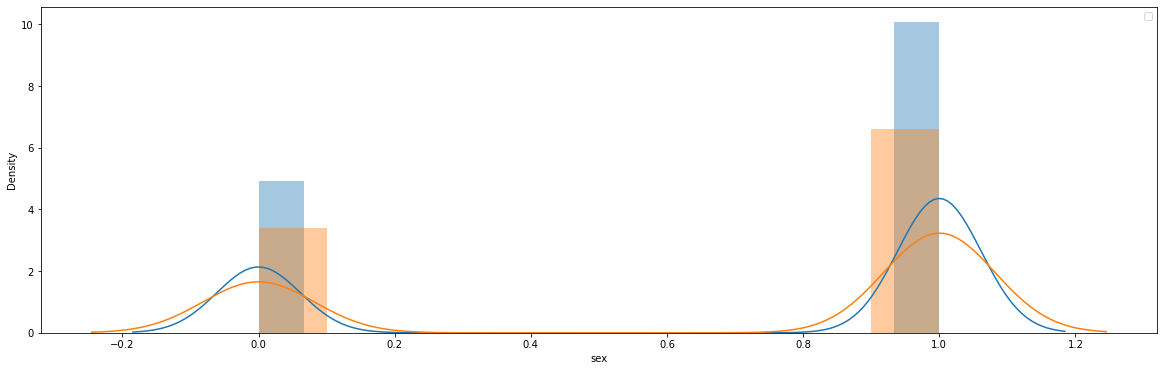

In [404]:
print(sp.stats.ks_2samp(test2['sex'], train2['sex']))

fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax = sns.distplot(train2['sex'], kde = True)
ax = sns.distplot(test2['sex'], kde = True)
plt.legend()
plt.show()

In [405]:
display_side_by_side(pd.concat([train['sex'].value_counts(),
          train['sex'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage')), 
                     pd.concat([test['sex'].value_counts(),
          test['sex'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage')))

,counts,percentage
Male,17482,67.111981
Female,8567,32.888019
,counts,percentage
Male,4308,66.154791
Female,2204,33.845209


### capital_gain

Ks_2sampResult(statistic=0.04368689776958812, pvalue=4.621632011188019e-09)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


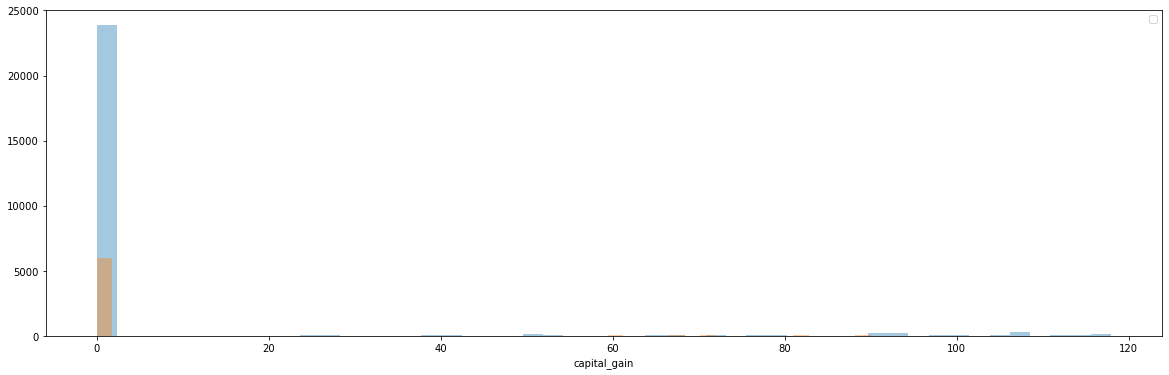

In [406]:
print(sp.stats.ks_2samp(test2['capital_gain'], train2['capital_gain']))

fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax = sns.distplot(train2['capital_gain'], kde = False)
ax = sns.distplot(test2['capital_gain'], kde = False)
plt.legend()
plt.show()

### capital_loss

Ks_2sampResult(statistic=0.022956458311462424, pvalue=0.008247849313273058)


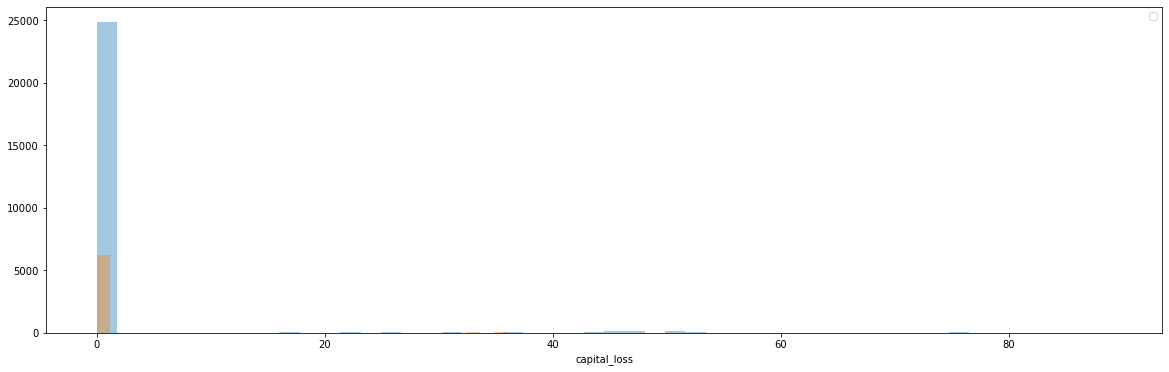

In [407]:
print(sp.stats.ks_2samp(test2['capital_loss'], train2['capital_loss']))

fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax = sns.distplot(train2['capital_loss'], kde = False)
ax = sns.distplot(test2['capital_loss'], kde = False)
plt.legend()
plt.show()

In [408]:
### hours_per_week

Ks_2sampResult(statistic=0.47321245737691664, pvalue=0.0)


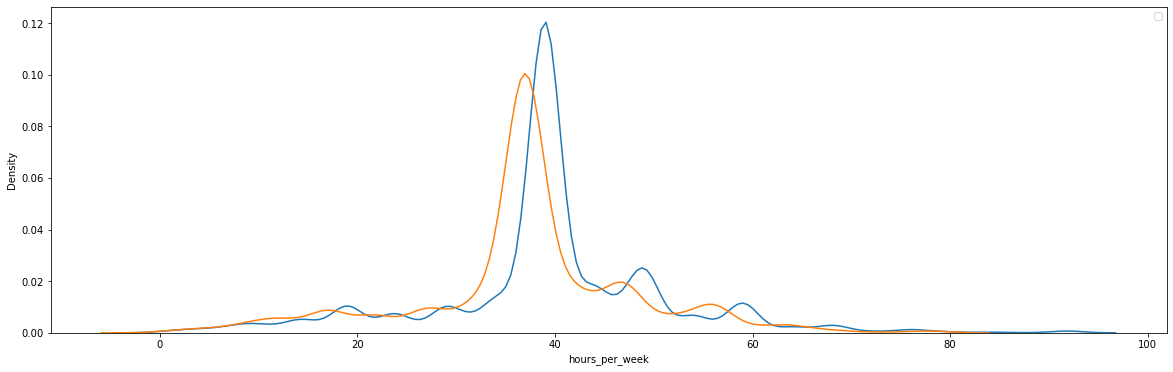

In [409]:
print(sp.stats.ks_2samp(test2['hours_per_week'], train2['hours_per_week']))

fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax = sns.kdeplot(train2['hours_per_week'])
ax = sns.kdeplot(test2['hours_per_week'])
plt.legend()
plt.show()

### native_country

Ks_2sampResult(statistic=0.8913545139791829, pvalue=0.0)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


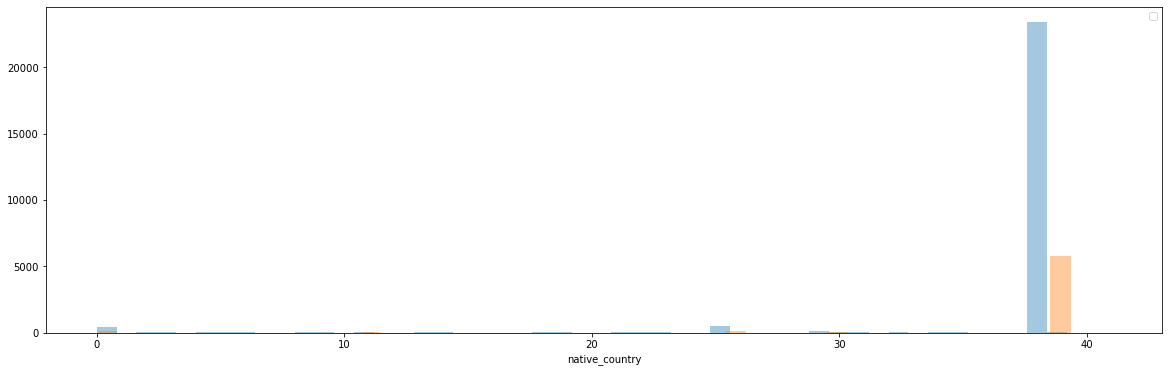

In [410]:
print(sp.stats.ks_2samp(test2['native_country'], train2['native_country']))

fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax = sns.distplot(train2['native_country'], kde = False)
ax = sns.distplot(test2['native_country'], kde = False)
plt.legend()
plt.show()

In [411]:
display_side_by_side(pd.concat([train['native_country'].value_counts(),
          train['native_country'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage')), 
                     pd.concat([test['native_country'].value_counts(),
          test['native_country'].value_counts(normalize = True).mul(100)], axis = 1, keys = ('counts', 'percentage')))

,counts,percentage
United-States,23371,89.719375
Mexico,534,2.049983
?,456,1.750547
Philippines,163,0.625744
Germany,101,0.387731
Puerto-Rico,95,0.364697
Canada,92,0.353181
El-Salvador,79,0.303275
India,77,0.295597
Cuba,76,0.291758


### Manny-U test

- H0: The distributions of populations are equal

In [412]:
columns = list(test)
for i in columns:
    print(sp.stats.mannwhitneyu(train2[i], test2[i]), i)

MannwhitneyuResult(statistic=21203072.0, pvalue=0.0) id
MannwhitneyuResult(statistic=84341812.0, pvalue=0.2424541674253689) age
MannwhitneyuResult(statistic=83967865.5, pvalue=0.06207322837664234) workclass
MannwhitneyuResult(statistic=26251333.5, pvalue=0.0) fnlwgt
MannwhitneyuResult(statistic=84781957.5, pvalue=0.4797509647018205) education
MannwhitneyuResult(statistic=84336644.5, pvalue=0.23451856158389134) education_num
MannwhitneyuResult(statistic=84211978.0, pvalue=0.1693721360208199) marital_status
MannwhitneyuResult(statistic=83967606.5, pvalue=0.10446172282109567) occupation
MannwhitneyuResult(statistic=84485054.5, pvalue=0.3049760401464272) relationship
MannwhitneyuResult(statistic=83810246.5, pvalue=0.007811437550641671) race
MannwhitneyuResult(statistic=84003698.0, pvalue=0.07100153946189817) sex
MannwhitneyuResult(statistic=84184181.5, pvalue=0.026070377598867718) capital_gain
MannwhitneyuResult(statistic=84567245.5, pvalue=0.15827957137927384) capital_loss
MannwhitneyuRes

# Capital - 조금 더 자세히 확인

In [413]:
train

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,log_capital_gain,log_capital_loss,capital_net
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,-11.512925,-11.512925,0
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,-11.512925,-11.512925,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,-11.512925,-11.512925,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K,-11.512925,-11.512925,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K,-11.512925,-11.512925,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,<=50K,-11.512925,-11.512925,0
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K,-11.512925,-11.512925,0
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K,-11.512925,-11.512925,0
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,Female,0,0,40,United-States,<=50K,-11.512925,-11.512925,0


In [414]:
test['log_capital_gain'] = np.log(test['capital_gain'] + 0.00001)
test['log_capital_loss'] = np.log(test['capital_loss'] + 0.00001)
test['capital_net'] = test['capital_gain'] - test['capital_loss']

In [415]:
test2 = test
train2 = train

### net capital

Ks_2sampResult(statistic=0.006984167902053473, pvalue=0.9612606831442777)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


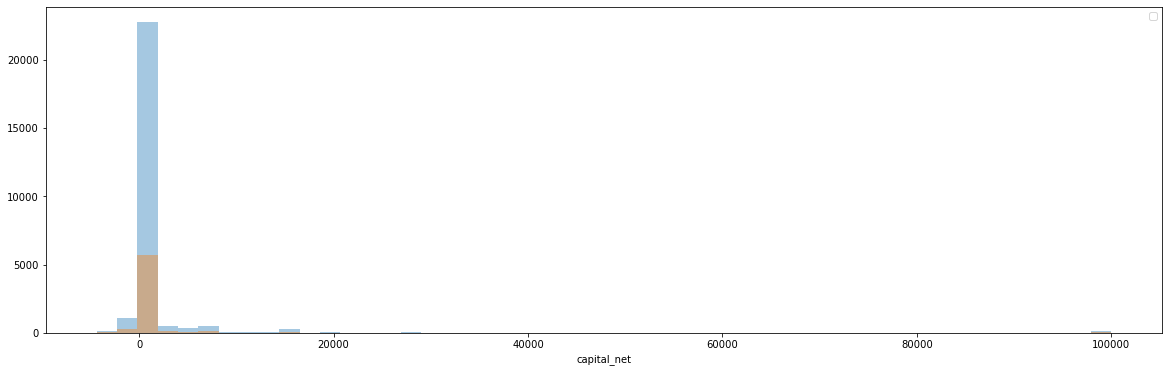

In [416]:
print(sp.stats.ks_2samp(test2['capital_net'], train2['capital_net']))

fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax = sns.distplot(train2['capital_net'], kde = False)
ax = sns.distplot(test2['capital_net'], kde = False)
plt.legend()
plt.show()

In [417]:
### log net capital

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Ks_2sampResult(statistic=0.009055456862954281, pvalue=0.7864108945758419)


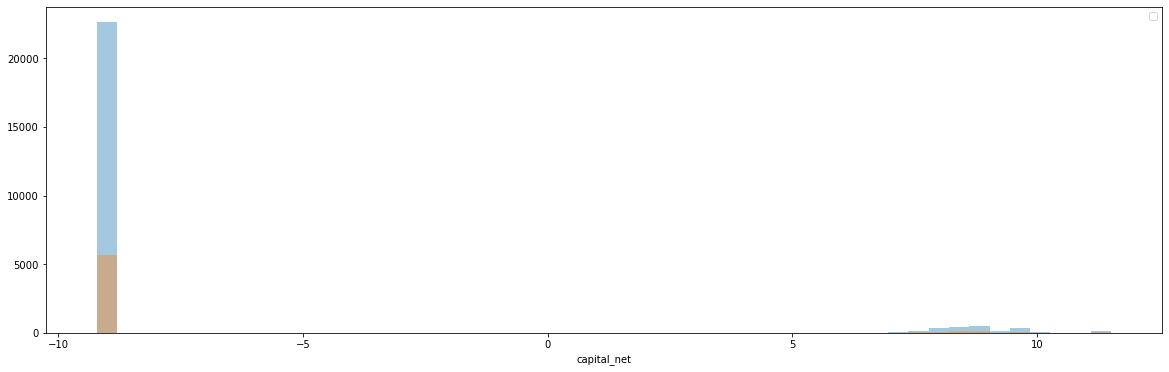

In [418]:
# log_capital
print(sp.stats.ks_2samp(np.log(test2['capital_net'] + 0.0001), np.log(train2['capital_net']+ 0.0001)))

fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax = sns.distplot(np.log(train2['capital_net']+ 0.0001), kde = False)
ax = sns.distplot(np.log(test2['capital_net']+ 0.0001), kde = False)
plt.legend()
plt.show()

In [419]:
### capital_binary

In [420]:
train

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,log_capital_gain,log_capital_loss,capital_net
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,-11.512925,-11.512925,0
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,-11.512925,-11.512925,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,-11.512925,-11.512925,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K,-11.512925,-11.512925,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K,-11.512925,-11.512925,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,<=50K,-11.512925,-11.512925,0
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K,-11.512925,-11.512925,0
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K,-11.512925,-11.512925,0
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,Female,0,0,40,United-States,<=50K,-11.512925,-11.512925,0


In [421]:
train2.at[train2[train2['capital_gain'] > 0].index, 'yes_captial_gain'] = 1
train2.at[train2[train2['capital_gain'] == 0].index, 'yes_capital_gain'] = 0
test2.at[test2[test2['capital_gain'] > 0].index, 'yes_capital_gain'] = 1
test2.at[test2[test2['capital_gain'] == 0].index, 'yes_capital_gain'] = 0


train2.at[train2[train2['capital_loss'] > 0].index, 'yes_capital_loss'] = 1
train2.at[train2[train2['capital_loss'] == 0].index, 'yes_capital_loss'] = 0
test2.at[test2[test2['capital_loss'] > 0].index, 'yes_capital_loss'] = 1
test2.at[test2[test2['capital_loss'] == 0].index, 'yes_capital_loss'] = 0

train2.at[train2[train2['capital_net'] != 0].index, 'yes_capital_net'] = 1
train2.at[train2[train2['capital_net'] == 0].index, 'yes_capital_net'] = 0
test2.at[test2[test2['capital_net'] != 0].index, 'yes_capital_net'] = 1
test2.at[test2[test2['capital_net'] == 0].index, 'yes_capital_net'] = 0

Ks_2sampResult(statistic=0.002071288960900808, pvalue=1.0)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


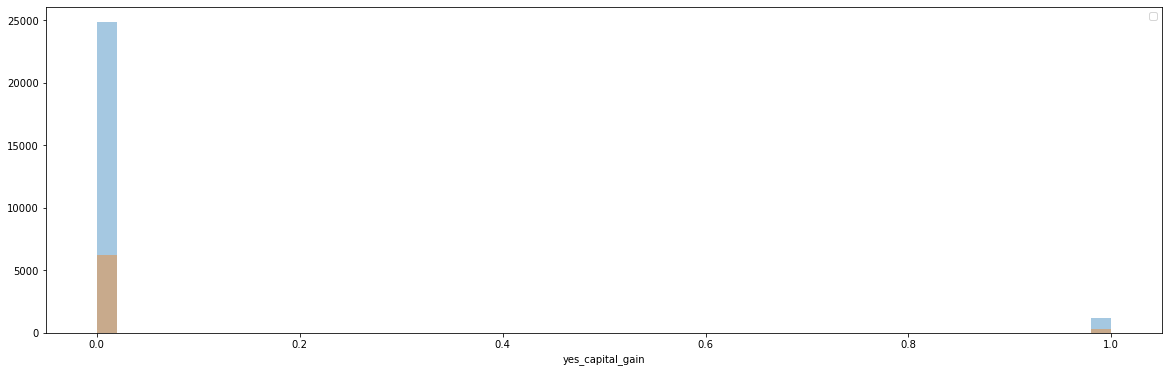

In [422]:
print(sp.stats.ks_2samp(test2['yes_capital_gain'], train2['yes_capital_gain']))

fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax = sns.distplot(train2['yes_capital_gain'], kde = False)
ax = sns.distplot(test2['yes_capital_gain'], kde = False)
plt.legend()
plt.show()

In [423]:
print(sp.stats.ks_2samp(test2['yes_capital_loss'], train2['yes_capital_loss']))

fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax = sns.distplot(train2['yes_capital_loss'], kde = False)
ax = sns.distplot(test2['yes_capital_loss'], kde = False)
plt.legend()
plt.show()

KeyError: 'yes_capital_loss'

In [ ]:
print(sp.stats.ks_2samp(test2['yes_capital_net'], train2['yes_capital_net']))

fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax = sns.distplot(train2['yes_capital_net'], kde = False)
ax = sns.distplot(test2['yes_capital_net'], kde = False)
plt.legend()
plt.show()